# 7번 moons 데이터셋에 결정트리를 훈련시키고 파라미터 튜닝하기

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_distribution = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(6, 24)),
    'min_samples_split': [2, 3, 4]
}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(model, param_distribution, cv=3, verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 3 folds for each of 5292 candidates, totalling 15876 fits


DecisionTreeClassifier(max_depth=6, max_leaf_nodes=4, random_state=42)

In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.855

# 8번 다음 단계에 따라 랜덤포레스트 만들기
1. 훈련 세트 서브셋 1000개 생성, 무작위로 선택된 100개의 샘플
2. 이전 최적 매개변수로 각 서브셋에 결정트리 훈련.
3. 각 테스트 샘플에 대해 1000개의 결정 트리 예측 만들고 다수로 나온 예측만 취함
4. 테스트 세트에서 예측 평가

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score

랜덤 포레스트 정확도: 0.9750


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


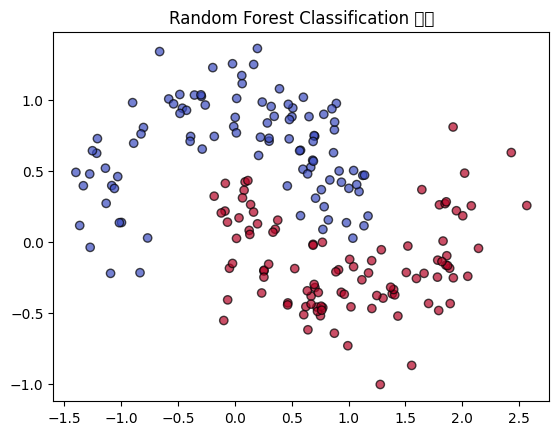

In [2]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_trees = 1000  # 결정 트리 개수
n_samples = 100  # 각 트리의 훈련 샘플 개수
tree_predictions = np.zeros((X_test.shape[0], n_trees))

ss = ShuffleSplit(n_splits=n_trees, train_size=n_samples, random_state=42)

for i, (train_idx, _) in enumerate(ss.split(X_train)):
    # 서브셋 선택
    X_subset, y_subset = X_train[train_idx], y_train[train_idx]

    tree = DecisionTreeClassifier(max_features='sqrt', random_state=i)
    tree.fit(X_subset, y_subset)

    tree_predictions[:, i] = tree.predict(X_test)

# 다수결 투표로 최종 예측
final_predictions = np.round(np.mean(tree_predictions, axis=1))

# 모델 평가
accuracy = accuracy_score(y_test, final_predictions)
print(f'랜덤 포레스트 정확도: {accuracy:.4f}')

# 데이터 시각화
plt.scatter(X_test[:, 0], X_test[:, 1], c=final_predictions, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title("Random Forest Classification 결과")
plt.show()


# 5장 10번

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SVM은 거리 기반 모델이므로 정규화 필요
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

모델 정확도: 0.9444

분류 보고서:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

